# AFL Tables - Data Analysis with Python

from http://afltables.com/afl/stats/alltime/richmond.html

AFL Tables is a website that has data on every player that has played an AFL game. It appears to be updated weekly. Here I am going to analyse this data to find various insights about players that have played for the Richmond Football Club.

<img src="http://s.afl.com.au/staticfile/AFL%20Tenant/Richmond/Club%20HQ/hofweb.jpg">

## Step 1: Import data

In [1]:
# import required packages

import pandas as pd
import numpy as np
import re
import image
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read in data file

df = pd.read_table('afltables_richmond')

In [3]:
# view raw data

df.head(3)

,Cap,#,Player,DOB,HT,WT,Games (W-D-L),Goals,Seasons,Debut,Last
0,677,29,"Bartlett, Kevin",1947-03-06,177cm,71kg,403 (260-4-139),778,1965-1983,18y 56d,36y 174d
1,325,17,"Dyer, Jack",1913-11-15,185cm,89kg,312 (206-4-102),443,1931-1949,17y 175d,35y 285d
2,692,30,"Bourke, Francis",1947-04-02,185cm,84kg,300 (202-3-95),71,1967-1981,20y 41d,34y 86d


## Step 2: Data cleaning/wrangling

In [4]:
# change column names and clean formatting

df.columns = ['Cap', 'Jersey No.', 'Player', 'DOB', 
            'Height(cm)', 'Weight(kg)', 'Games (W-D-L)','Goals', 'Seasons', 'Debut', 'Last']

In [5]:
# set the index as Cap

df = df.set_index('Cap')

In [6]:
# remove cm from heights and kg from weights

df['Height(cm)'] = df['Height(cm)'].apply(lambda x:x.split('c')[0])
df['Weight(kg)'] = df['Weight(kg)'].apply(lambda x:x.split('k')[0])

In [7]:
# change height, weight, goals, jersey columns from strings to integers

df['Height(cm)'] = pd.to_numeric(df['Height(cm)'],errors='coerce')
df['Weight(kg)'] = pd.to_numeric(df['Weight(kg)'],errors='coerce')
df['Goals'] = pd.to_numeric(df['Goals'],errors='coerce')
df['Jersey No.'] = pd.to_numeric(df['Jersey No.'],errors='coerce')

In [8]:
# convert DOB to timeStamp, and check output

df['DOB'] = pd.to_datetime(df['DOB'])
type(df['DOB'].iloc[0])

pandas.tslib.Timestamp

In [9]:
# split Games (W-D-L) into separate columns
# not finished, need to remove brackets and make won and lost numeric

df['Games(total)'] =  pd.to_numeric(df['Games (W-D-L)'].apply(lambda x:re.split(' |-',x)[0]))
df['Games(won)'] = pd.to_numeric(df['Games (W-D-L)'].apply(lambda x:re.split(r'[`\-=~!@#$%^&*()_+\[\]{};\'\\:"|<,./<>?]',x)[1]))
df['Games(drawn)'] = pd.to_numeric(df['Games (W-D-L)'].apply(lambda x:re.split(' |-',x)[2]))
df['Games(lost)'] = pd.to_numeric(df['Games (W-D-L)'].apply(lambda x:re.split(r'[`\-=~!@#$%^&*()_+\[\]{};\'\\:"|<,./<>?]',x)[3]))

In [10]:
# create columns first season and last season

df['First Season'] = df['Seasons'].apply(lambda x:x.split('-')[0])
df['Last Season'] = df['Seasons'].apply(lambda x:x.split('-')[-1]) 

df['First Season'] = pd.to_numeric(df['First Season'],errors='coerce')
df['Last Season'] = pd.to_numeric(df['Last Season'],errors='coerce')

In [11]:
# add DOB year column

df['DOByear'] = df['DOB'].apply(lambda x: x.year)

In [12]:
# create column number of seasons

df['No. of Seasons'] = df['Last Season']-df['First Season']+1

In [13]:
# create column ave games per season

df['Ave Games/Season'] = df['Games(total)']/df['No. of Seasons']

In [14]:
# drop columns

df.drop('Games (W-D-L)',axis=1,inplace=True)
df.drop('Seasons',axis=1,inplace=True)

In [15]:
# convert Debut and Last into number of years as a float

df['Debut years'] = df['Debut'].apply(lambda x:re.split('y',x)[0])
df['Debut days'] = df['Debut'].apply(lambda x:re.split('y',x)[1])
df['Debut days'] = df['Debut days'].apply(lambda x:re.split('d',x)[0])

df['Debut years'] = pd.to_numeric(df['Debut years'],errors='coerce')
df['Debut years decimal'] = pd.to_numeric(df['Debut days'],errors='coerce')/365

df['Last years'] = df['Last'].apply(lambda x:re.split('y',x)[0])
df['Last days'] = df['Last'].apply(lambda x:re.split('y',x)[1])
df['Last days'] = df['Last days'].apply(lambda x:re.split('d',x)[0])

df['Last years'] = pd.to_numeric(df['Last years'],errors='coerce')
df['Last years decimal'] = pd.to_numeric(df['Last days'],errors='coerce')/365

df['Age at Debut'] = df['Debut years'] + df['Debut years decimal']
df['Age at Last Game'] = df['Last years'] + df['Last years decimal']

df.drop(['Debut years', 'Debut days', 'Debut', 'Debut years decimal', 'Last years', 'Last days', 
         'Last', 'Last years decimal'], axis=1, inplace=True)

In [16]:
# create a win % column

df['Win%'] = df['Games(won)'] / df['Games(total)']

In [17]:
# fill missing jersey numbers to number 0

df['Jersey No.'].fillna(value=0, inplace=True)

**Output**

In [18]:
df.head(3)

,Jersey No.,Player,DOB,Height(cm),Weight(kg),Goals,Games(total),Games(won),Games(drawn),Games(lost),First Season,Last Season,DOByear,No. of Seasons,Ave Games/Season,Age at Debut,Age at Last Game,Win%
Cap,,,,,,,,,,,,,,,,,,
677,29.0,"Bartlett, Kevin",1947-03-06,177.0,71.0,778.0,403,260,4,139,1965.0,1983.0,1947,19.0,21.210526,18.153425,36.476712,0.645161
325,17.0,"Dyer, Jack",1913-11-15,185.0,89.0,443.0,312,206,4,102,1931.0,1949.0,1913,19.0,16.421053,17.479452,35.780822,0.660256
692,30.0,"Bourke, Francis",1947-04-02,185.0,84.0,71.0,300,202,3,95,1967.0,1981.0,1947,15.0,20.000000,20.112329,34.235616,0.673333


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 677 to 1145
Data columns (total 18 columns):
Jersey No.          1149 non-null float64
Player              1149 non-null object
DOB                 1149 non-null datetime64[ns]
Height(cm)          1115 non-null float64
Weight(kg)          1043 non-null float64
Goals               833 non-null float64
Games(total)        1149 non-null int64
Games(won)          1149 non-null int64
Games(drawn)        1149 non-null int64
Games(lost)         1149 non-null int64
First Season        1099 non-null float64
Last Season         1091 non-null float64
DOByear             1149 non-null int64
No. of Seasons      1068 non-null float64
Ave Games/Season    1068 non-null float64
Age at Debut        1145 non-null float64
Age at Last Game    1145 non-null float64
Win%                1149 non-null float64
dtypes: datetime64[ns](1), float64(11), int64(5), object(1)
memory usage: 170.6+ KB


## Step 3: Insights

### Who are the 'stockiest' and 'skinniest' players and when did they play?

In [20]:
# create BMI column

df['BMI']=df['Weight(kg)']/((df['Height(cm)']/100)**2)

**'stockiest' players**

In [21]:
df[['Player','Last Season','Height(cm)','Weight(kg)','BMI']].sort_values('BMI',ascending=False).head(5)

,Player,Last Season,Height(cm),Weight(kg),BMI
Cap,,,,,
340,"Guinane, Danny",1943.0,179.0,100.0,31.210012
166,"Fehring, Charlie",1919.0,188.0,108.0,30.556813
101,"Ellingsen, Percy",1912.0,168.0,86.0,30.470522
229,"Ross, George",1923.0,170.0,86.0,29.757785
552,"Gorwell, John",1955.0,160.0,76.0,29.687500


**'skinniest' players**

In [22]:
df[['Player','Last Season','Height(cm)','Weight(kg)','BMI']].sort_values('BMI',ascending=True).head(5)

,Player,Last Season,Height(cm),Weight(kg),BMI
Cap,,,,,
216,"Birtles, Arthur",1922.0,178.0,62.0,19.568236
1135,"Menadue, Connor",2016.0,187.0,69.0,19.731762
639,"Behan, Lance",1963.0,193.0,74.0,19.866305
1145,"Chol, Mabior",2016.0,198.0,78.0,19.895929
10,"Luff, Bill",1910.0,191.0,73.0,20.010416


### Are players getting taller and/or heavier?

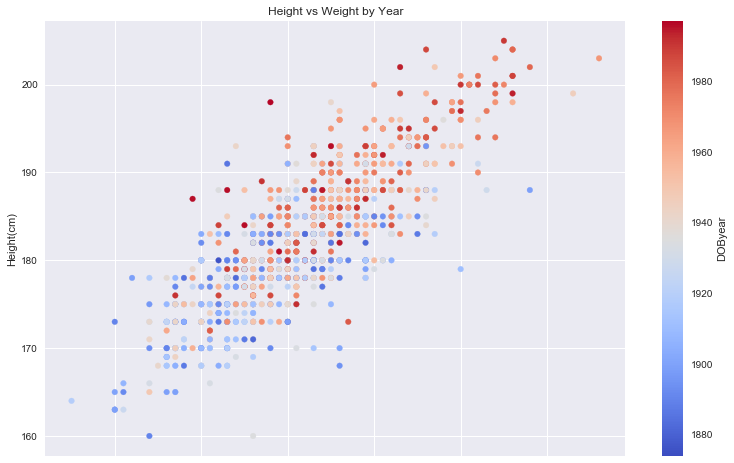

In [52]:
# plot height vs weight coloured by date of birth

df.plot(kind='scatter', x='Weight(kg)', y='Height(cm)', c='DOByear', cmap='coolwarm', s=32, title='Height vs Weight by Year', figsize=(13,8))

### What is the most worn jersey number?

**by number of players**

In [57]:
pd.DataFrame(df.groupby('Jersey No.').count()[['Games(total)']].sort_values('Games(total)',ascending=False)).head(5)

,Games(total)
Jersey No.,
0.0,76
28.0,37
26.0,36
27.0,34
6.0,33


**by games played**

In [25]:
pd.DataFrame(df.groupby('Jersey No.').sum()[['Games(total)']].sort_values('Games(total)',ascending=False)).head(5)

,Games(total)
Jersey No.,
4.0,1641
1.0,1636
3.0,1561
2.0,1544
9.0,1522


### Games record holders for each jersey number

In [26]:
def func(group):
    return group.loc[group['Games(total)'] == group['Games(total)'].max()]

df.groupby('Jersey No.').apply(func).reset_index(drop=True)

,Jersey No.,Player,DOB,Height(cm),Weight(kg),Goals,Games(total),Games(won),Games(drawn),Games(lost),First Season,Last Season,DOByear,No. of Seasons,Ave Games/Season,Age at Debut,Age at Last Game,Win%,BMI
0,0.0,"Incigneri, Len",1884-01-03,180.0,89.0,4.0,62,24,1,37,1908.0,1911.0,1884,4.0,15.500000,24.328767,27.663014,0.387097,27.469136
1,1.0,"Newman, Chris",1982-05-18,183.0,81.0,56.0,268,105,5,158,2002.0,2015.0,1982,14.0,19.142857,20.019178,33.323288,0.391791,24.187046
2,2.0,"Gaspar, Darren",1976-05-20,192.0,90.0,22.0,207,90,0,117,1996.0,2007.0,1976,12.0,17.250000,19.882192,30.939726,0.434783,24.414062
3,3.0,"Weightman, Dale",1959-10-03,170.0,69.0,344.0,274,118,2,154,1978.0,1993.0,1959,16.0,17.125000,18.493151,33.901370,0.430657,23.875433
4,4.0,"Rogers, Matthew",1973-11-25,185.0,90.0,163.0,197,101,1,95,1994.0,2004.0,1973,11.0,17.909091,20.331507,30.624658,0.512690,26.296567
5,5.0,"Thorp, Vic",1890-10-25,178.0,83.0,7.0,263,116,3,144,1910.0,1925.0,1890,16.0,16.437500,19.512329,34.882192,0.441065,26.196187
6,6.0,"Chaffey, Mark",1977-05-06,178.0,82.0,34.0,166,70,0,96,1997.0,2006.0,1977,10.0,16.600000,19.953425,29.326027,0.421687,25.880571
7,7.0,"Martin, Ray",1909-11-18,173.0,73.0,135.0,159,111,2,46,NaN,1940.0,1909,NaN,NaN,20.473973,30.863014,0.698113,24.391059
8,8.0,"Clay, Dick",1945-03-06,185.0,89.0,80.0,213,152,2,59,1966.0,1976.0,1945,11.0,19.363636,21.150685,31.191781,0.713615,26.004383
9,9.0,"Campbell, Wayne",1972-09-23,189.0,88.0,172.0,297,131,1,165,1991.0,2005.0,1972,15.0,19.800000,18.572603,32.928767,0.441077,24.635369


<img src="https://s-media-cache-ak0.pinimg.com/originals/77/93/cd/7793cdb9c73178ddd20252b49114cf5d.jpg">

### Players with most ave games per season?

In [27]:
df[['Player','Games(total)','Ave Games/Season']].sort_values('Ave Games/Season',ascending=False).head(5)

,Player,Games(total),Ave Games/Season
Cap,,,
865,"McKenna, Michael",22,22.000000
854,"Annear, John",65,21.666667
742,"Sproule, Paul",86,21.500000
677,"Bartlett, Kevin",403,21.210526
966,"Broderick, Paul",169,21.125000


### Most ave goals per game?

In [28]:
df['Ave Goals per Game']=df['Goals']/df['Games(total)']
df[['Player','Games(total)','Ave Goals per Game']].sort_values('Ave Goals per Game',ascending=False).head(5)

,Player,Games(total),Ave Goals per Game
Cap,,,
219,"Lynch, Dave",20,3.850000
445,"Murray, Sel",13,3.846154
824,"Taylor, Brian",43,3.627907
729,"Greenslade, Malcolm",2,3.500000
286,"Titus, Jack",294,3.299320


### How many games do players play?

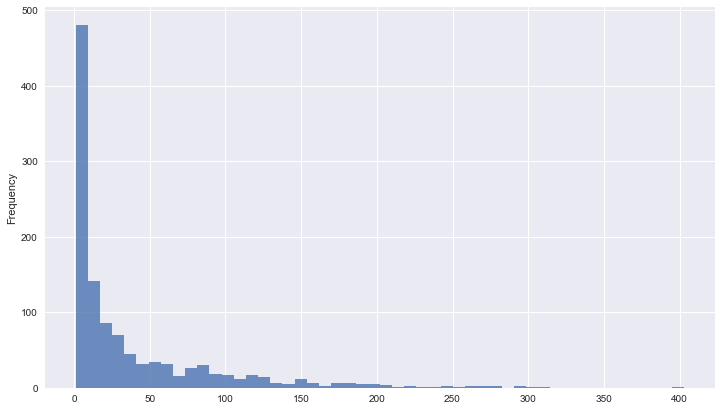

In [29]:
df['Games(total)'].plot.hist(alpha=0.8,bins=50, figsize=(12,7))

### Youngest players?

In [30]:
df.sort_values('Age at Debut')[['Player','Age at Debut']].head()

,Player,Age at Debut
Cap,,
61,"Maguire, Mick",15.898630
524,"Morcom, Stan",16.523288
168,"Don, Donald",16.797260
728,"Beckwith, Bill",16.865753
101,"Ellingsen, Percy",16.912329


### Oldest players?

In [31]:
df.sort_values('Age at Last Game', ascending=False)[['Player','Age at Last Game']].head()

,Player,Age at Last Game
Cap,,
759,"Cloke, David",36.589041
677,"Bartlett, Kevin",36.476712
810,"Rowlings, Barry",35.986301
325,"Dyer, Jack",35.780822
11,"Mahoney, Bill",35.657534


<img src="https://upload.wikimedia.org/wikipedia/en/thumb/a/ac/JackDyer.jpg/220px-JackDyer.jpg">

### Most common surnames?

In [32]:
pd.DataFrame(df['Player'].apply(lambda x: re.split(',',x)[0]).value_counts()).head(8)

,Player
Smith,14
Wilson,8
Bourke,7
Ryan,7
Edwards,6
Roberts,6
Richardson,6
James,6


### Most common first names?

In [33]:
pd.DataFrame(df['Player'].apply(lambda x: re.split(',',x)[1]).value_counts()).head(8)

,Player
Bill,44
Jack,42
John,28
Frank,25
George,24
Kevin,22
Ray,21
Bob,21


### Most common month born?

There is a theory that people born at certain times of the year are more likely to become successfull athletes

In [34]:
df['DOB'].dt.month.value_counts()

10    113
6     111
3     102
5     101
4     101
8      98
1      98
12     96
9      86
7      84
2      83
11     76
Name: DOB, dtype: int64

No noticeable correllation

### Of the current players, who:

**Have played the most games?**

In [35]:
df[df['Last Season']==2017].sort_values('Games(total)', ascending=False)[['Player','Games(total)']].head(8)

,Player,Games(total)
Cap,,
1071,"Riewoldt, Jack",205
1068,"Edwards, Shane",189
1076,"Cotchin, Trent",176
1089,"Martin, Dustin",156
1082,"Rance, Alex",153
1103,"Grigg, Shaun",127
1105,"Houli, Bachar",126
1107,"Ellis, Brandon",113


**Are the oldest?**

In [36]:
df[df['Last Season']==2017].sort_values('DOB', ascending=True)[['Player','DOB']].head(8)

,Player,DOB
Cap,,
1103,"Grigg, Shaun",1988-04-19
1105,"Houli, Bachar",1988-05-12
1068,"Edwards, Shane",1988-10-25
1071,"Riewoldt, Jack",1988-10-31
1082,"Rance, Alex",1989-10-09
1126,"Lloyd, Sam",1990-03-03
1076,"Cotchin, Trent",1990-04-07
1129,"Hunt, Taylor",1990-11-05


### Debuts per season

In [37]:
pd.DataFrame(df['First Season'].value_counts()).head(8)

,First Season
1908.0,33
1909.0,22
1910.0,20
1912.0,19
1959.0,18
1923.0,17
1925.0,17
1961.0,16


Seems to reason that there was a high turnover of players in the first few years hence 1908, 1909, 1910, and 1912 make up the top 4.

### Number of games played by debut season

In [38]:
df[['First Season','Games(total)']].groupby('First Season').sum().sort_values('Games(total)', ascending=False).head()

,Games(total)
First Season,
1908.0,946
1967.0,936
1925.0,903
1965.0,857
1993.0,847


Richmond's first season in the AFL was 1908 so it's not suprising to find that many games were played by players who debut in 1908. It is interesting to see both 1967 and 1965 in the top 5, this indicates that there was likely many debuts by good players that year.

### Average games played by debut season

In [39]:
df[['First Season','Games(total)']].groupby('First Season').mean().sort_values('Games(total)', ascending=False).head()

,Games(total)
First Season,
1967.0,133.714286
1966.0,111.750000
1996.0,101.000000
2007.0,95.166667
2005.0,88.222222


1967 appears again indicating it was a very successfull year of recruiting for Richmond. 1966 appears also. Lets see who these new recruits were in 1967.

In [40]:
df[df['First Season']==1967][['Player','Games(total)']].head(5)

,Player,Games(total)
Cap,,
692,"Bourke, Francis",300
691,"Sheedy, Kevin",251
689,"Hart, Royce",187
694,"Bond, Graeme",115
693,"Bowden, Michael",59


Some big names! 

Now lets see the players that debut across the three years 1965/66/67.

In [41]:
df[(df['First Season']==1967) | (df['First Season']==1966) | (df['First Season']==1965)][['Player','Games(total)']].head(6)

,Player,Games(total)
Cap,,
677,"Bartlett, Kevin",403
692,"Bourke, Francis",300
691,"Sheedy, Kevin",251
684,"Clay, Dick",213
689,"Hart, Royce",187
688,"Green, Mike",146


Six players in Richmonds team of the century debut in these years, including two of the top three all time games club record holders.

Next lets see how this correllated with success on the field. We will only use win/loss ratios since this is all that is available in this data set.

<img src="http://resources1.news.com.au/images/2013/06/04/1226657/260917-royce-hart.jpg">

### Player Win/Loss ratios

For players that have played 100+ games

In [42]:
df[df['Games(total)']>99][['Player','Games(total)','First Season','Last Season','Win%']].sort_values('Win%', ascending=False).head(10)

,Player,Games(total),First Season,Last Season,Win%
Cap,,,,,
318,"Zschech, Eric",102,1930.0,1935.0,0.764706
302,"Judkins, Stan",133,1928.0,1936.0,0.751880
293,"Murdoch, Joe",180,1927.0,1936.0,0.744444
289,"Baggott, Jack",128,1927.0,1935.0,0.742188
324,"Strang, Gordon",116,1931.0,NaN,0.741379
308,"Heifner, Fred",100,1929.0,1935.0,0.730000
689,"Hart, Royce",187,1967.0,1977.0,0.727273
699,"Hunt, Rex",113,1968.0,1974.0,0.725664
684,"Clay, Dick",213,1966.0,1976.0,0.713615


It seems that Richmonds two most dominant periods were the early 30's followed by the early 70's

<img src=https://s-media-cache-ak0.pinimg.com/736x/5e/13/78/5e13781a36971d2408f67e410c346376.jpg>

## Further ideas

In [43]:
# set up webscraping to scrape this date from page, so that it is live
# scrape data for all teams and combine all into one table, will need to add another column 'team'

# average age for each season, are players getting younger or older?
# retirements per season
# seasons when the most games retired
# of the players that debut in (current year), who has played the most games, kicked the most goals?
# average age each year
# active players per season
# best win/loss ratios
# worst win/loss ratios
# what % of players make it past 10,50,100 games? create bins
# which seasons appear to be the most successful? based on active players and their win/loss ratios
# estimate goals/game for each season
# are players playing for longer than they used to? 
# error checking and rectifying. isnull()
# convert floats to ints, unabledue to NaN's
# error check players last season